## Libs

In [25]:
%matplotlib inline

import os

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import skimage

import cv2
import seaborn as sns

## 2d spectrum of an images

In [2]:
bacteria = cv2.imread('test_input_1.bmp')

In [3]:
bacteria.shape

(1216, 1616, 3)

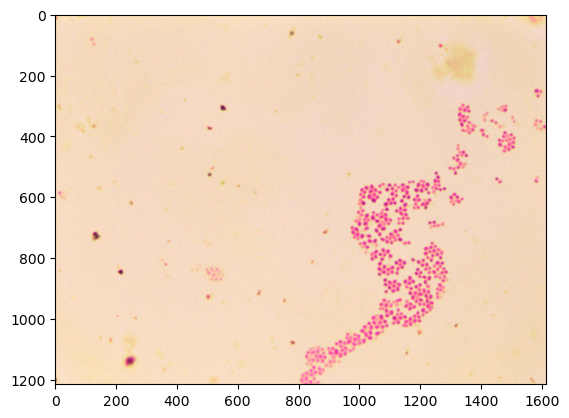

In [4]:
plt.imshow(bacteria[:,:,::-1])
plt.show()

In [5]:
image_fft = np.fft.fft2(bacteria, axes=(0,1))

In [6]:
np.abs(image_fft[:,:,1])

array([[4.18918174e+08, 7.45661864e+06, 3.74758711e+06, ...,
        1.58585103e+06, 3.74758711e+06, 7.45661864e+06],
       [3.40639898e+06, 4.20286191e+06, 4.75945765e+06, ...,
        2.83048798e+06, 2.52641107e+06, 2.47769193e+06],
       [7.52261834e+05, 7.49224118e+05, 4.68027863e+05, ...,
        1.77318735e+06, 2.25540550e+06, 1.13638051e+06],
       ...,
       [1.20702828e+06, 6.16860252e+05, 2.16823908e+05, ...,
        2.96005436e+06, 3.25188044e+06, 2.07686084e+06],
       [7.52261834e+05, 1.13638051e+06, 2.25540550e+06, ...,
        8.67931361e+05, 4.68027863e+05, 7.49224118e+05],
       [3.40639898e+06, 2.47769193e+06, 2.52641107e+06, ...,
        3.05880372e+06, 4.75945765e+06, 4.20286191e+06]])

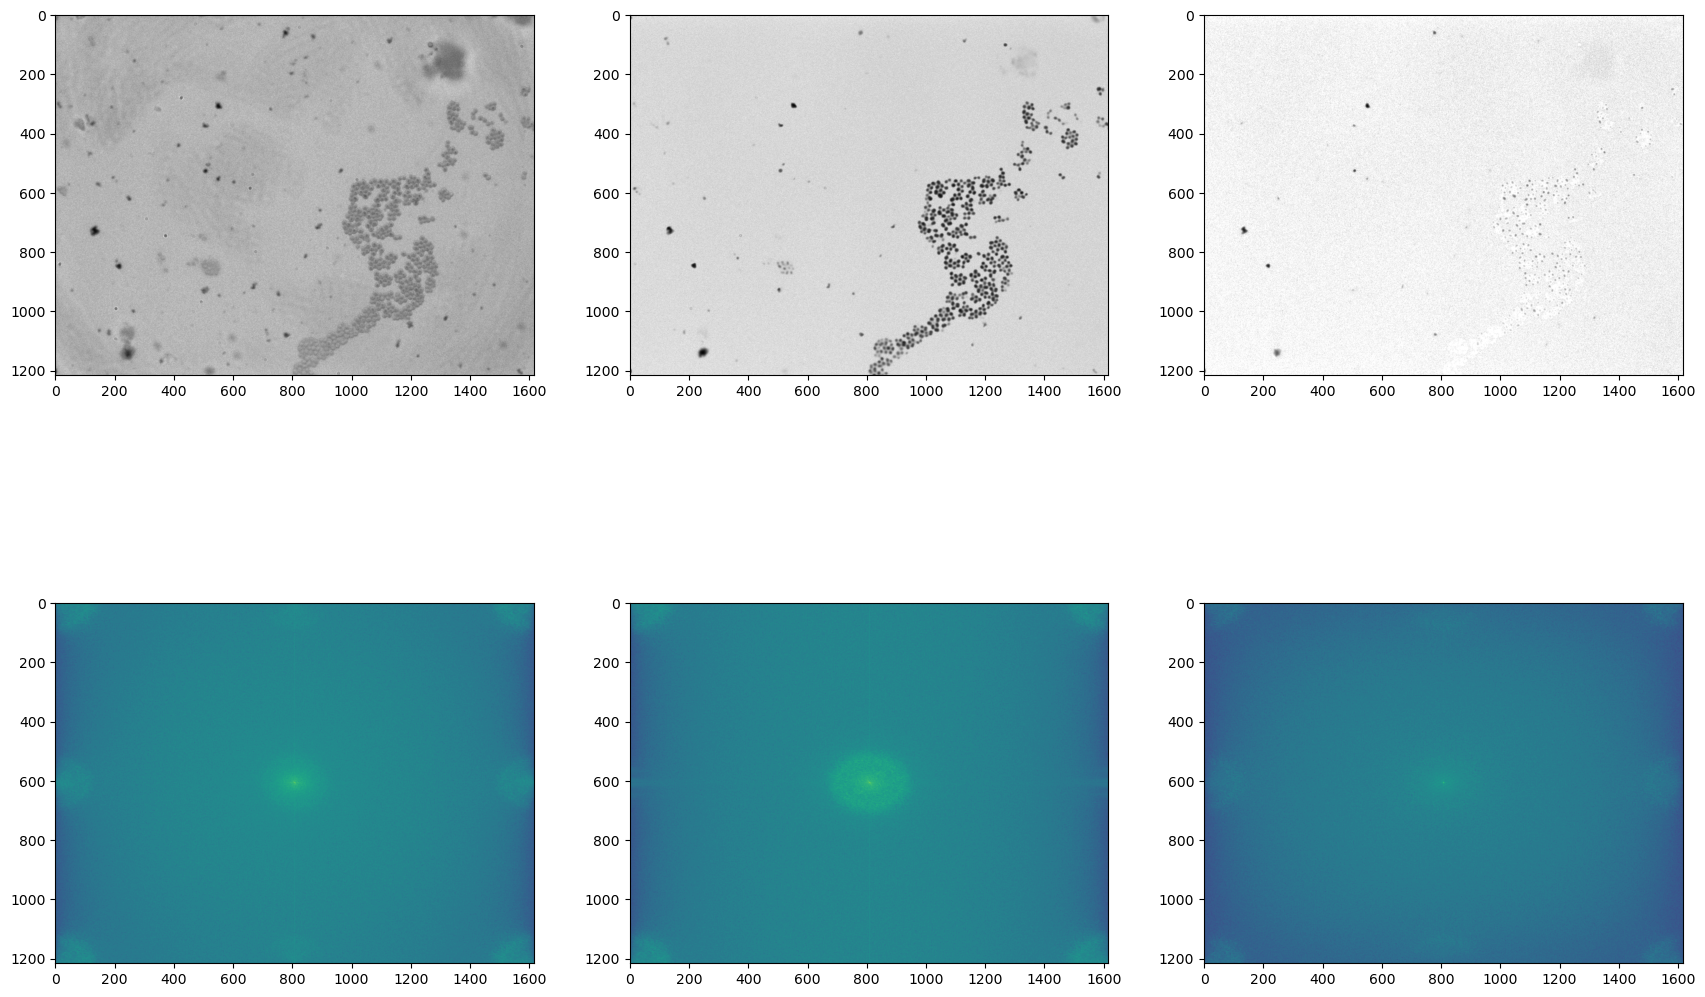

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(21,14))

for i in range(3):
    ax[0][i].imshow(bacteria[:,:,i], cmap = "gray")

for i in range(3):
    ax[1][i].imshow(np.log(np.abs(np.fft.fftshift(image_fft[:,:,i]))**2))

plt.show()

In [8]:
bacteria_yuv = cv2.cvtColor(bacteria, cv2.COLOR_BGR2YUV)
bacteria_yuv_fft = np.fft.fft2(bacteria_yuv, axes=(0,1))

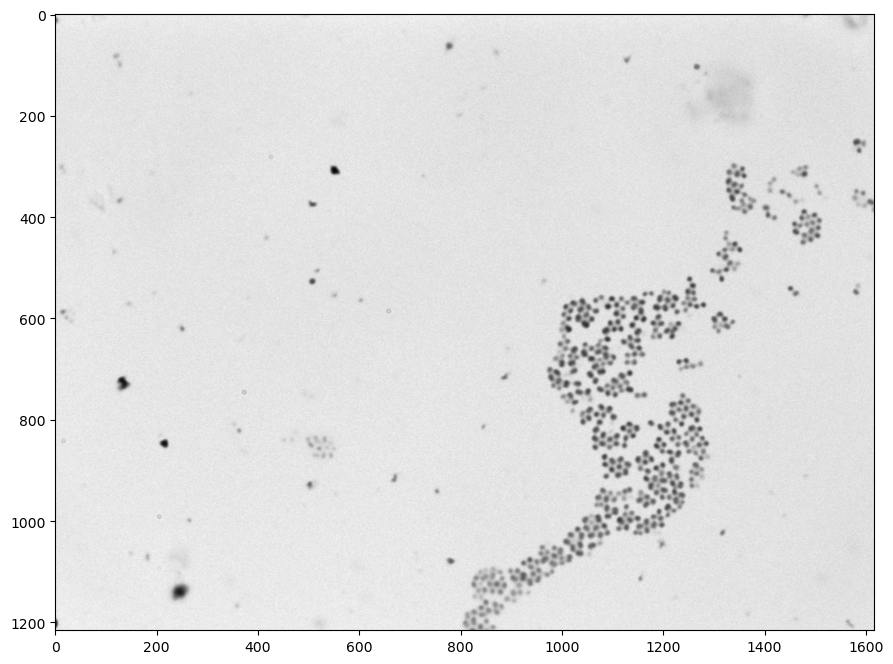

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

plt.imshow(bacteria_yuv[:,:,0], cmap='gray')
plt.show()

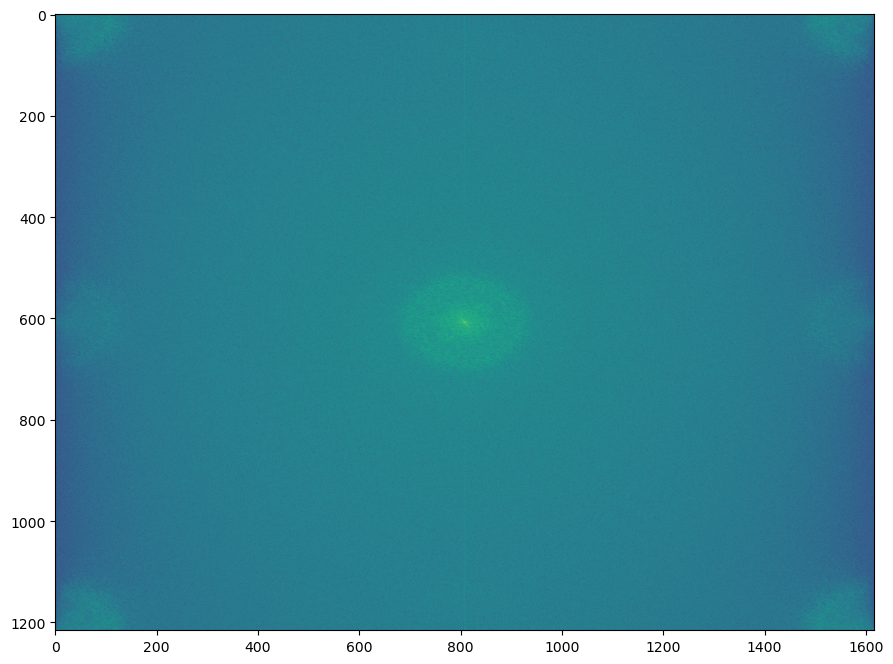

In [10]:
bacteria_yuv_fft = np.fft.fft2(bacteria_yuv, axes=(0,1))

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.imshow(np.log(np.abs(np.fft.fftshift(bacteria_yuv_fft[:,:,i]))**2))
plt.show()

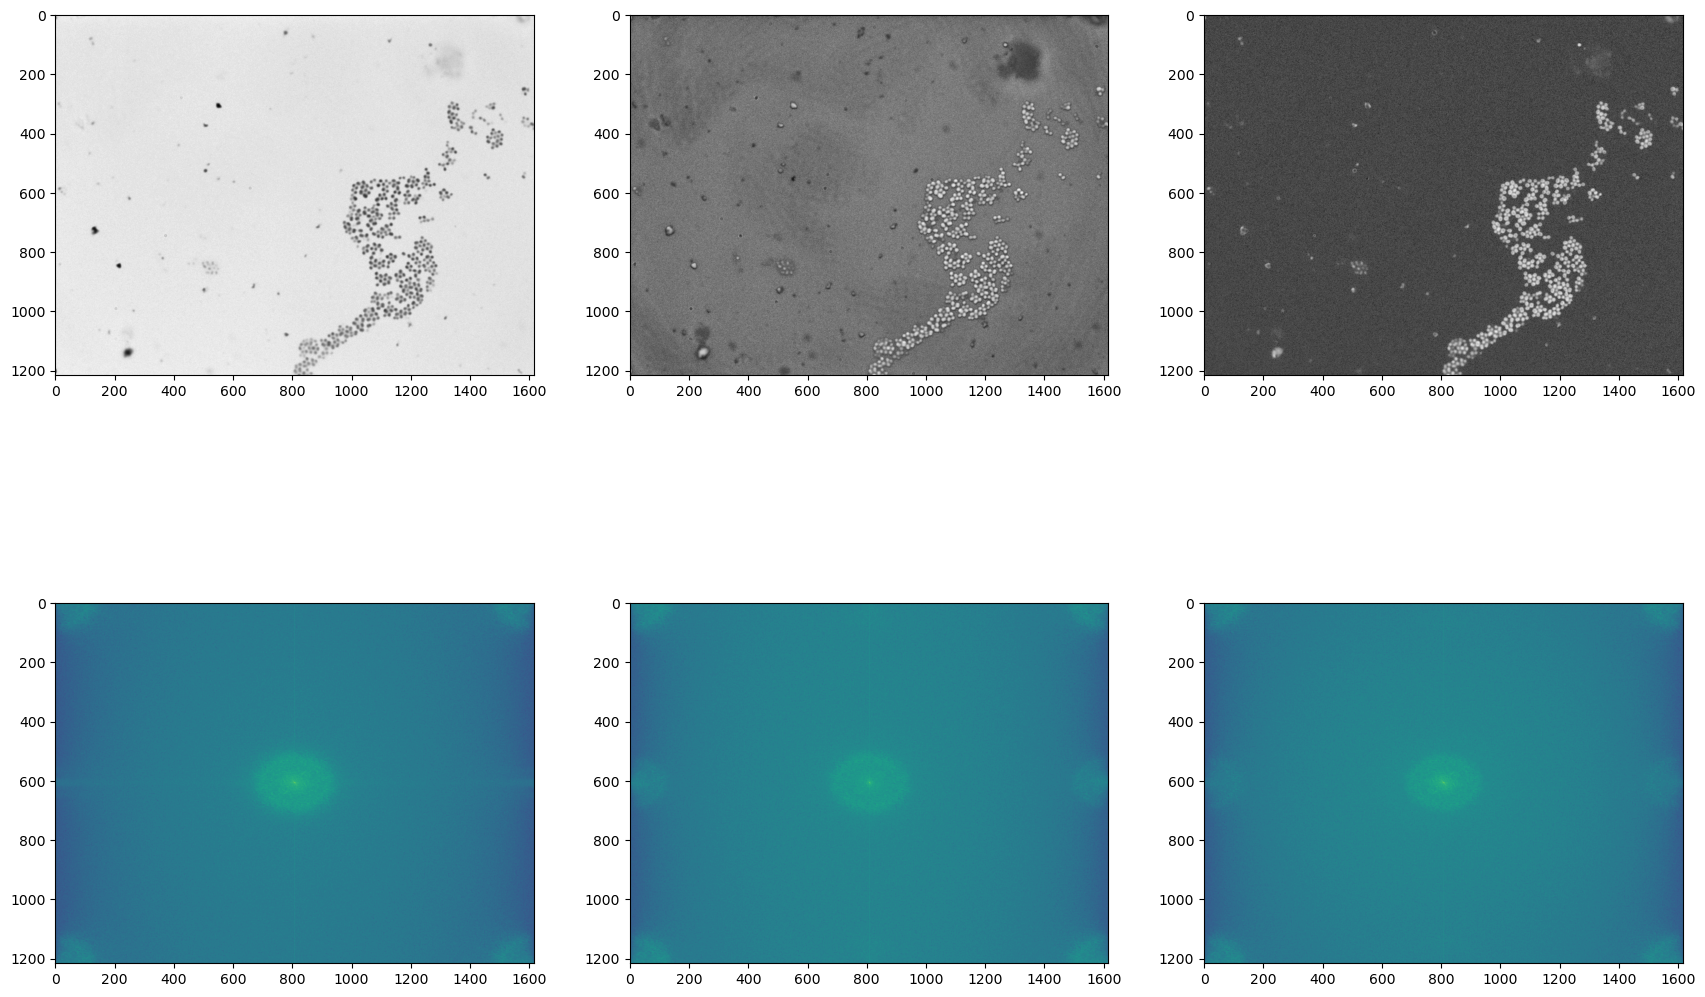

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(21,14))

for i in range(3):
    ax[0][i].imshow(bacteria_yuv[:,:,i], cmap = "gray")

for i in range(3):
    ax[1][i].imshow(np.log(np.abs(np.fft.fftshift(bacteria_yuv_fft[:,:,i]))**2))

plt.show()

In [12]:
skimage.filters.unsharp_mask(bacteria[:,:,1])

array([[1.        , 1.        , 1.        , ..., 0.96022987, 0.95420144,
        1.        ],
       [0.83435317, 0.82975242, 0.89656279, ..., 0.8632354 , 0.82746728,
        0.82366969],
       [0.87392411, 0.83796881, 0.84711605, ..., 0.92248747, 0.92248071,
        0.92634602],
       ...,
       [0.73996031, 0.68351903, 0.88647674, ..., 0.93055674, 0.89647666,
        0.89195453],
       [0.57590634, 0.94007939, 0.89058936, ..., 0.79468542, 0.78859153,
        0.90723806],
       [0.93562548, 0.90753761, 0.95310689, ..., 0.85461594, 0.86189328,
        0.85621752]])

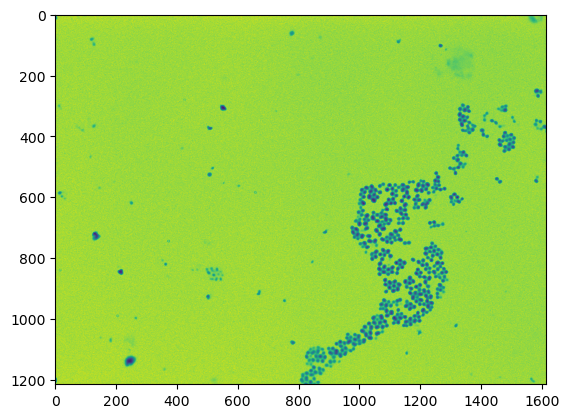

In [13]:
plt.imshow(skimage.filters.unsharp_mask(bacteria[:,:,1]))
plt.show()

In [14]:
# image_out = skimage.filters.unsharp_mask(bacteria, channel_axis=2)[:,:,::-1]
image_out = skimage.filters.gaussian(bacteria, channel_axis=2)[:,:,::-1]
# image_out = cv2.bilateralFilter(bacteria, d=5, sigmaColor=40, sigmaSpace=40)[:,:,::-1]
# image_out = skimage.filters.butterworth(bacteria, cutoff_frequency_ratio = 0.16, high_pass = False, order=3, npad=32, channel_axis=2)[:,:,::-1]

cv2.imwrite("test_output_1_gaussian.bmp", cv2.cvtColor(cv2.normalize(image_out, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U), cv2.COLOR_BGR2RGB))

True

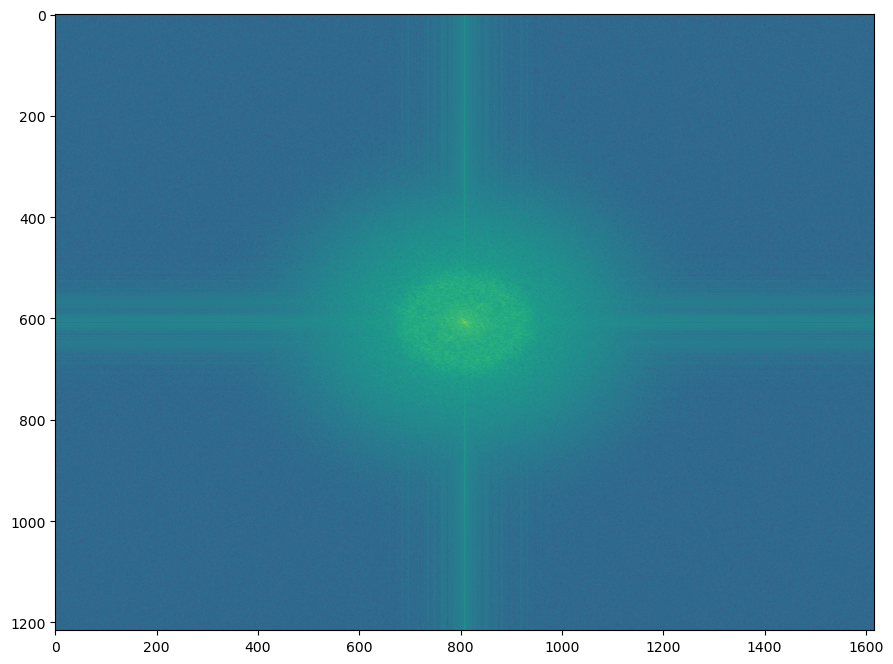

In [15]:
bacteria = cv2.imread('test_output_1_butterworth.bmp')

bacteria_fft = np.fft.fft2(bacteria, axes=(0,1))

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.imshow(np.log(np.abs(np.fft.fftshift(bacteria_fft[:,:,1]))**2))
plt.show()

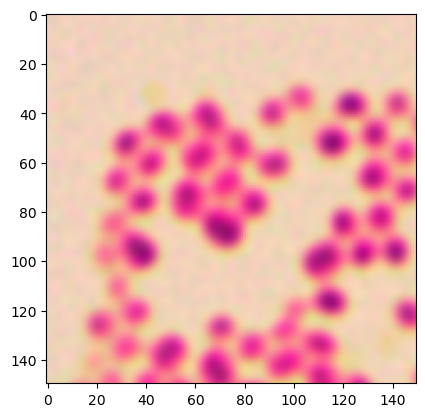

In [16]:
bacteria = cv2.imread('test_output_1_butterworth.bmp')

plt.imshow(bacteria[525:675,975:1125,::-1])
plt.show()

## Custom filter

lanczos

In [45]:
def sinc(offset , a = 3):
    return np.sinc(offset)*np.sinc(offset/a)

def lanczos_window(a = 3, size = 5):
    offset = np.linspace(-a, a, size)
    weights_1d = sinc(offset, a)
    weights_2d = np.matmul(weights_1d.reshape(size, 1), weights_1d.reshape(1, size))
    return weights_2d

In [46]:
lanczos_window()

array([[ 2.30910625e-66, -2.05286764e-34,  1.51957436e-33,
        -2.05286764e-34,  2.30910625e-66],
       [-2.05286764e-34,  1.82506351e-02, -1.35094912e-01,
         1.82506351e-02, -2.05286764e-34],
       [ 1.51957436e-33, -1.35094912e-01,  1.00000000e+00,
        -1.35094912e-01,  1.51957436e-33],
       [-2.05286764e-34,  1.82506351e-02, -1.35094912e-01,
         1.82506351e-02, -2.05286764e-34],
       [ 2.30910625e-66, -2.05286764e-34,  1.51957436e-33,
        -2.05286764e-34,  2.30910625e-66]])

<AxesSubplot: >

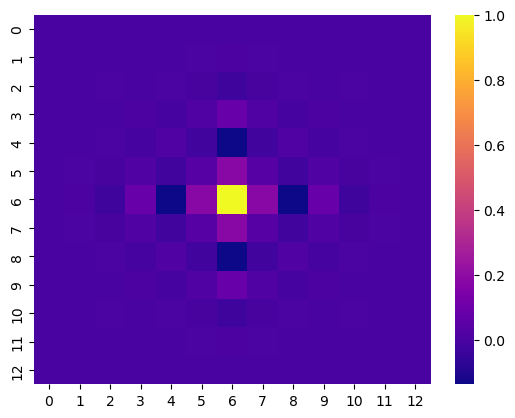

In [89]:
sns.heatmap(lanczos_window(a = 5, size = 13),cmap='plasma')

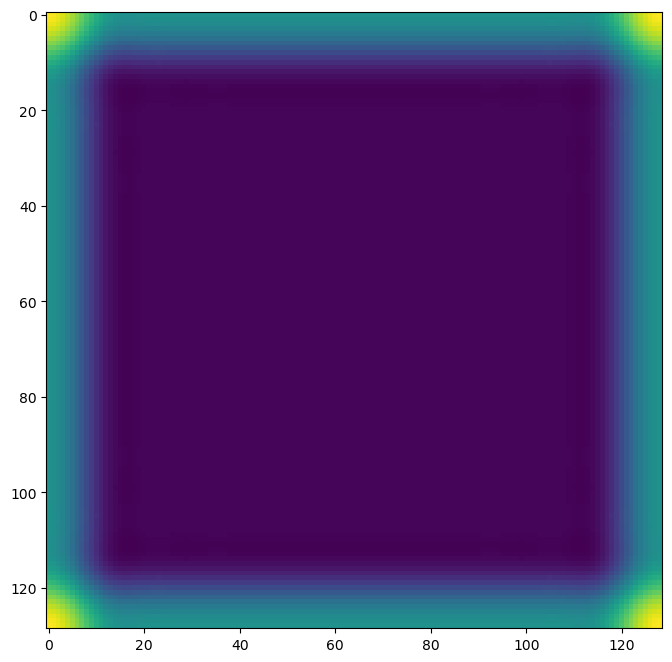

In [100]:
filter = lanczos_window(a = 11, size = 21)

filter_fft = np.fft.fft2(filter, s = (129, 129), axes=(0,1))

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.imshow(np.log(np.abs(np.fft.fftshift(filter_fft))**2))
plt.show()

In [101]:
# define a 5x5 kernel
# kernel = np.ones((5,5),np.float32)/25
kernel = lanczos_window(a=11, size = 21)

# Apply the averaging filter
# result = bacteria[525:675,975:1125,1]
# result = cv2.filter2D(bacteria[525:675,975:1125,1],-1,kernel)
result = cv2.filter2D(bacteria[:,:,1],-1,kernel)

# Display the output image
cv2.imshow("Filter 2D Image ", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the output image
# cv2.imwrite("test_output_1_lanczos_3_9.bmp", cv2.cvtColor(cv2.normalize(result, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U), cv2.COLOR_BGR2RGB))

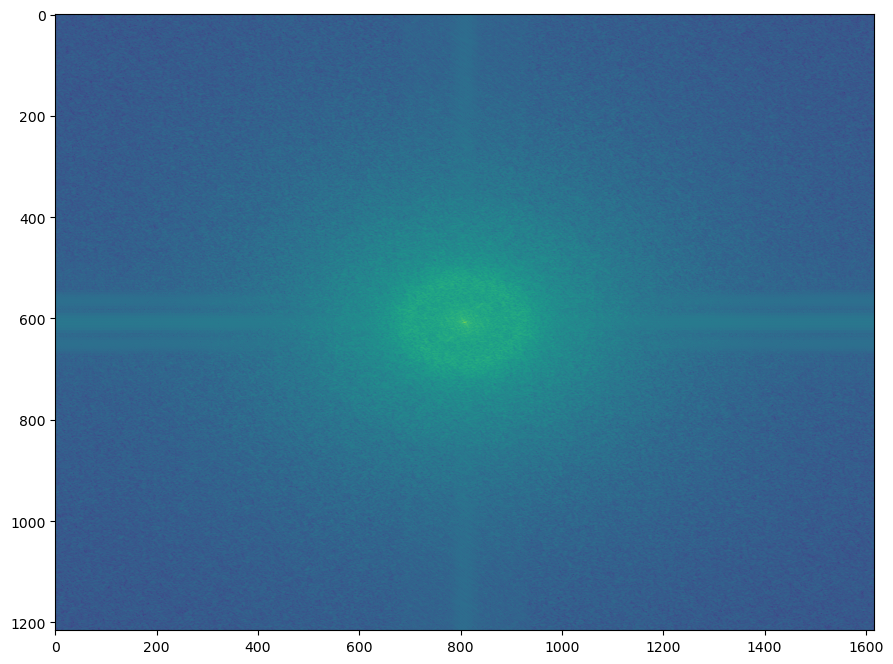

In [85]:
bacteria = cv2.imread('test_output_1_lanczos_4_11.bmp')

bacteria_fft = np.fft.fft2(bacteria, axes=(0,1))

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.imshow(np.log(np.abs(np.fft.fftshift(bacteria_fft[:,:,1]))**2))
plt.show()